# Causal Discovery with Census Data

Code authored by: Shawhin Talebi <br />
Causal Discovery Toolbox: https://fentechsolutions.github.io/CausalDiscoveryToolbox/html/index.html <br />
Data from: https://archive.ics.uci.edu/ml/datasets/census+income

### Import libraries

In [1]:
import pandas as pd

In [11]:
import pickle

import cdt
import networkx as nx
import matplotlib.pyplot as plt

cdt.SETTINGS.rpath = "C:\\Program Files\\R\R-4.1.3\\bin\\Rscript"

### Load data

In [12]:
df = pickle.load( open( "df_causal_discovery.p", "rb" ) )

In [13]:
df = pd.read_pickle("all.pkl")
df.columns.values
sel = ['aqr_stocks', 'aqr_bonds',
       'aqr_comm', 'sbbi_stocks', 'sbbi_small_caps', 'sbbi_corp',
       'sbbi_govt_20', 'sbbi_govt_5', 'sbbi_rf', 'sbbi_cpi', 'cpi',
       'shiller_cpi', 'sbbi_corp_spreads', 'comm_ex_precious_metals'], 
sel =  ['sector_nodur', 'sector_durbl', 'sector_manuf',
       'sector_enrgy', 'sector_chems', 'sector_buseq', 'sector_telcm',
       'sector_utils', 'sector_shops', 'sector_hlth ', 'sector_money',
       'sector_other']
df = df[sel[:5]].dropna()
df.corr()

,sector_nodur,sector_durbl,sector_manuf,sector_enrgy,sector_chems
sector_nodur,1.000000,0.725430,0.830530,0.612195,0.830724
sector_durbl,0.725430,1.000000,0.847403,0.604465,0.796852
sector_manuf,0.830530,0.847403,1.000000,0.718899,0.890092
sector_enrgy,0.612195,0.604465,0.718899,1.000000,0.664170
sector_chems,0.830724,0.796852,0.890092,0.664170,1.000000


In [14]:
#df = pd.read_csv("adult.csv", header=None)
df = df / df.std()

df

,sector_nodur,sector_durbl,sector_manuf,sector_enrgy,sector_chems
1926-07-31,0.267423,1.929033,0.516646,-0.220547,1.367841
1926-08-31,0.810844,0.431278,0.324828,0.505140,0.858474
1926-09-30,0.199133,0.575562,-0.044577,-0.568102,0.891204
1926-10-31,-0.340252,-1.076118,-0.521714,-0.172678,-0.855505
1926-11-30,1.067074,-0.062834,0.526407,-0.046990,0.843435
...,...,...,...,...,...
2021-09-30,-0.997682,0.357122,-0.936033,1.669025,-0.824452
2021-10-31,0.817261,3.854844,0.675598,1.609119,1.042841
2021-11-30,-0.823605,0.213362,-0.164167,-0.858269,0.074686
2021-12-31,1.754839,-0.559730,0.621210,0.484202,1.685373


### Get skeleton using graph Lasso

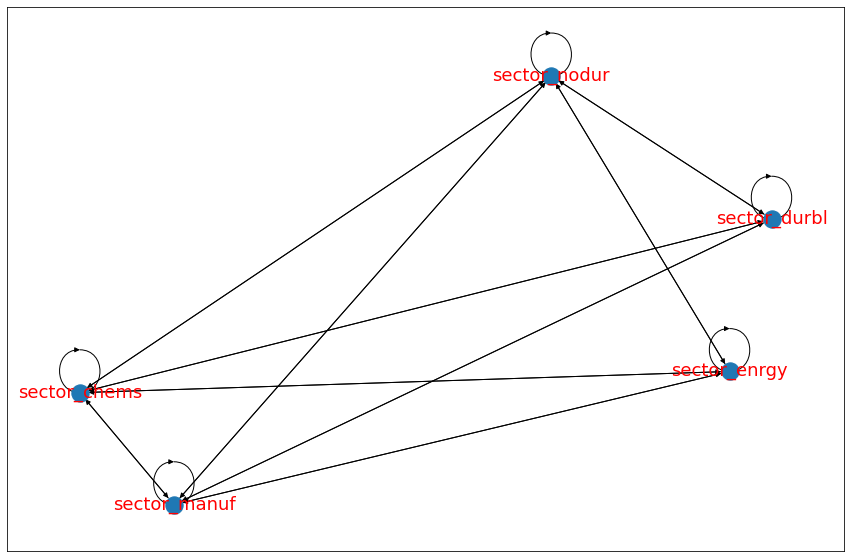

In [15]:
# intialize graph lasso
glasso = cdt.independence.graph.Glasso()

# apply graph lasso to dataset
skeleton = glasso.predict(df)

# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(skeleton, font_size=18, font_color='r')

### Use causal discovery to get causal model

#### PC

PC is ran on the skeleton of the given graph.


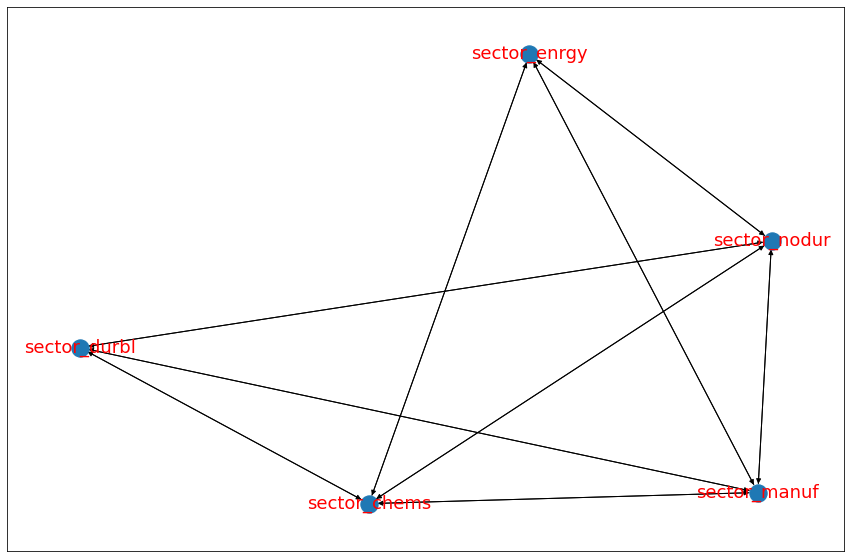

In [16]:
model_pc = cdt.causality.graph.PC()
# graph_pc = model_pc.predict(df)
graph_pc = model_pc.predict(df, skeleton)

# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_pc, font_size=18, font_color='r')

# get adjaceny matrix of PC graph
A_pc = nx.adjacency_matrix(graph_pc).todense()

#### GES

GES is ran on the skeleton of the given graph.


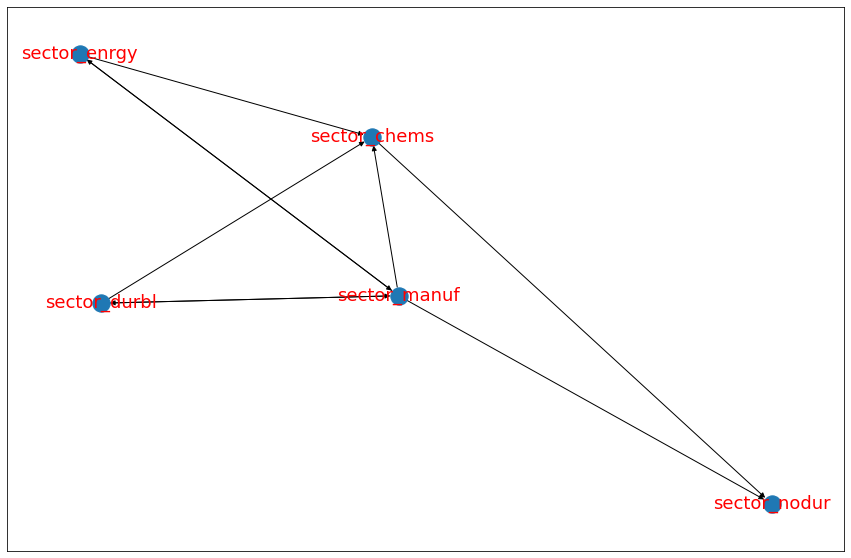

In [17]:
# initialize causal discovery model
model_ges = cdt.causality.graph.GES()
# apply causal discovery model to data and skeleton
graph_ges = model_ges.predict(df, skeleton)

# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_ges, font_size=18, font_color='r')

# get adjaceny matrix of GES graph
A_ges = nx.adjacency_matrix(graph_ges).todense()

#### GIES

GIES is ran on the skeleton of the given graph.


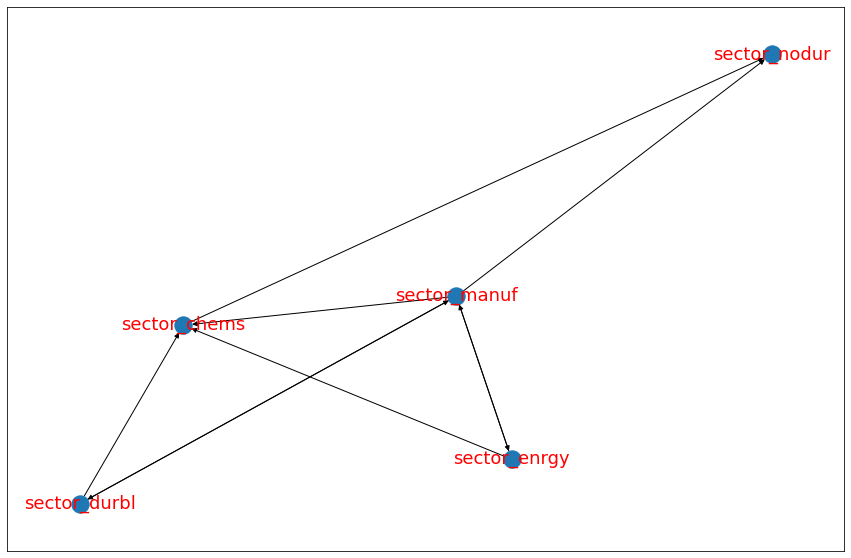

In [18]:
model_gies = cdt.causality.graph.GIES()
graph_gies = model_gies.predict(df, skeleton)

# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_gies, font_size=18, font_color='r')

# get adjaceny matrix of GIES graph
A_gies = nx.adjacency_matrix(graph_gies).todense()

#### LiNGAM

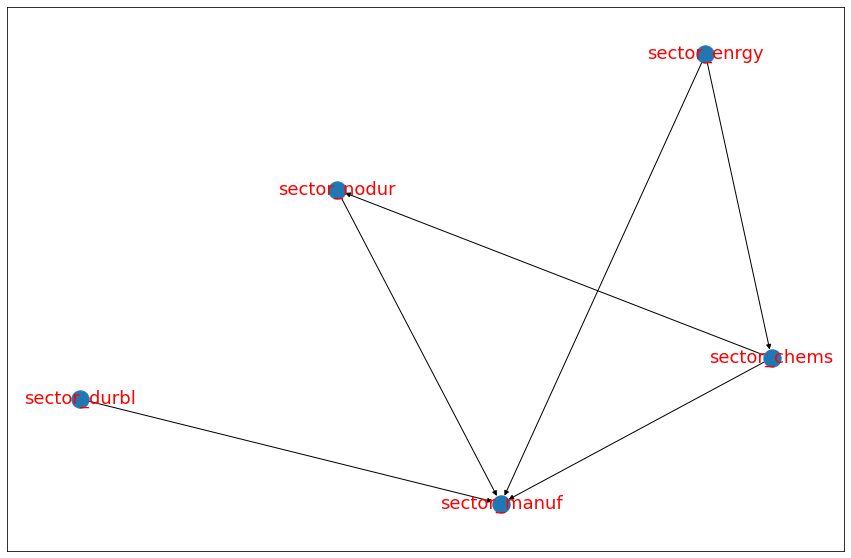

In [19]:
model_lingam = cdt.causality.graph.LiNGAM()
graph_lingam = model_lingam.predict(df)

# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_lingam, font_size=18, font_color='r')

# get adjaceny matrix of LiNGAM graph
A_lingam = nx.adjacency_matrix(graph_lingam).todense()